Hands-on APRIL 4th · 18:00h (GMT+1)

In [ ]:
! cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


# 10 líneas de Python para crear y entrenar una red

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics = ['accuracy'])

_ = model.fit(x_train, y_train, epochs=10, verbose=0)


11501568/11490434 [==============================] - 0s 0us/step


### ¿Resultado? en `model` tenemos un modelo entrenado

# ¿Cómo usar el modelo `model`  para inferir?


![figura model](https://raw.githubusercontent.com/jorditorresBCN/HACK-FROM-HOME-ROUND-2/master/model-neural-net-graph.png)

## con `model.predict()`

descargamos imagenes de ejemplo en el `array` x_text 

In [ ]:
_, (x_test, _ )= tf.keras.datasets.mnist.load_data()
x_test_ = x_test.reshape(10000, 784).astype('float32')/255

In [ ]:
image = 5

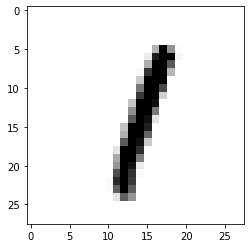

In [ ]:
import matplotlib.pyplot as plt
_ = plt.imshow(x_test[image], cmap=plt.cm.binary)

In [ ]:
import numpy as np

prediction = model.predict(x_test_)
print("Predicción del modelo: ", np.argmax(prediction[image]) )

Predicción del modelo:  1


# ¿Entrenamiento?  4 pasos

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical



### 1 - Obtención y preparación de los datos para entrenar

In [ ]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=10)

### 2 - Definición del modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


###3 - Configuración del proceso de *learning*

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])



###4 - Entrenamiento del modelo

In [ ]:
_ = model.fit(x_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8976 - accuracy: 0.5323
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3008 - accuracy: 0.7497
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9724 - accuracy: 0.8080
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7836 - accuracy: 0.8382
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6674 - accuracy: 0.8547
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5915 - accuracy: 0.8660
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5390 - accuracy: 0.8733
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5009 - accuracy: 0.8783
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4722 - accuracy: 0.8830
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.449

![Back to presentation](https://raw.githubusercontent.com/jorditorresBCN/HACK-FROM-HOME-ROUND-2/master/back-to-presentation.png)

# Evaluación del modelo

In [ ]:
_, (x_test, y_test)= tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test, num_classes=10)

_ , test_acc = model.evaluate(x_test, y_test)
print('Porcentaje de aciertos:', test_acc*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8907
Porcentaje de aciertos: 89.06999826431274


![Back to presentation](https://raw.githubusercontent.com/jorditorresBCN/HACK-FROM-HOME-ROUND-2/master/back-to-presentation.png)


# ¿Mejorar el modelo? : CNN



In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

_ = model.fit(train_images, train_labels, epochs=10)

_ , test_acc = model.evaluate(test_images, test_labels)

print('Porcentaje de aciertos:', test_acc*100)

Epoch 1/10
1002/1875 [===============>..............] - ETA: 27s - loss: 0.7081 - accuracy: 0.8063

![Back to presentation](https://raw.githubusercontent.com/jorditorresBCN/HACK-FROM-HOME-ROUND-2/master/back-to-presentation.png)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

_ = model.fit(train_images, train_labels, epochs=10)

_ , test_acc = model.evaluate(test_images, test_labels)

print('Porcentaje de aciertos:', test_acc*100)

# BONUS TRACK: ¿Y en PyTorch?

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms

#1 - Obtención y preparación de los datos para entrenar
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64)
testloader  = torch.utils.data.DataLoader(testset, batch_size=64)

#2-Definición del Modelo
model=torch.nn.Sequential(torch.nn.Linear(784,10), 
                          torch.nn.Sigmoid(), 
                          torch.nn.Linear(10,10), 
                          torch.nn.LogSoftmax(dim=1) 
                         )

#3-Configuración del modelo
criterion = torch.nn.NLLLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#4-Bucle de entrenamiento 
epochs = 10
for e in range(epochs):
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) 
        output = model(images)
        loss = criterion(output, labels)        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





In [ ]:
#5-Evaluación del modelo
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("\nModel Accuracy =", (correct_count/all_count))
    